# **Programming for Data Science**
## **Final Project**

**Student Information:**

Student D|Full Name
-|-
21127469|Vo Thanh Tu
22127117|Ly Lien Hoa
22127232|Le Thi Ngoc Linh

## **1. Collecting Data** 

### About Dataset
- The dataset provides historical sales data of an electronics company, encompassing 16 distinct features to analyze business performance.
- The analysis focuses on identifying sales trends, evaluating product performance, and assessing customer loyalty to optimize marketing efforts, enhance engagement, and drive growth in the electronics category.

## **2. Exploring Data Analysis (EDA)**

### 2.1 Overal Dataset view

#### Library

In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Clear annoying package and version warnings
import warnings
warnings.filterwarnings('ignore')

#### Read dataset

In [2]:
df = pd.read_csv('Data/sales.csv')

In [3]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


#### Data shape

In [4]:
rows, cols = df.shape

print(f'Number of rows: {rows}')
print(f'Number of cols: {cols}')

Number of rows: 20000
Number of cols: 16


Dataset have 20000 rows and 16 columns.

### 2.2 Row Detail

##### Row meaning 
- The dataset comprises sales information for individual transactions, with each row corresponding to a unique purchase record. Each record includes detailed transaction-related data, providing insights into customer behavior, product performance, and sales metrics. The dataset is structured such that each row represents a comprehensive snapshot of a single transaction, enabling a thorough analysis of sales trends and factors specific to each purchase.

##### Check duplicate

In [5]:
dup_rows = df[df.duplicated()]

print(f'Number of duplicated rows: {len(dup_rows)}')

Number of duplicated rows: 0


The dataset has no duplicates row.

### 2.3 Column Detail

In [6]:
descriptions = pd.read_csv('Data/description.csv')

pd.set_option('display.max_colwidth', None)
descriptions

,Feature,Description
0,Customer ID,Unique identifier for each customer
1,Age,Age of the customer (numeric)
2,Gender,Gender of the customer (Male or Female)
3,Loyalty Member,"(Yes/No) (Values change by time, so pay attention to who cancelled and who signed up)"
4,Product Type,"Type of electronic product sold (e.g., Smartphone, Laptop, Tablet)"
5,SKU,a unique code for each product
6,Rating,Customer rating of the product (1-5 stars) (Should have no Null Ratings)
7,Order Status,"Status of the order (Completed, Cancelled)"
8,Payment Method,"Method used for payment (e.g., Cash, Credit Card, Paypal)"
9,Total Price,Total price of the transaction (numeric)


In [7]:
df.dtypes

Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object

In [8]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%Y-%m-%d')

df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Loyalty Member               object
Product Type                 object
SKU                          object
Rating                        int64
Order Status                 object
Payment Method               object
Total Price                 float64
Unit Price                  float64
Quantity                      int64
Purchase Date        datetime64[ns]
Shipping Type                object
Add-ons Purchased            object
Add-on Total                float64
dtype: object

In [9]:
df['Add-ons Purchased'] = df['Add-ons Purchased'].fillna(value='None')

df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,None,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,None,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [10]:
# Double checking any other na values

df.isna().nunique()

Customer ID          1
Age                  1
Gender               2
Loyalty Member       1
Product Type         1
SKU                  1
Rating               1
Order Status         1
Payment Method       1
Total Price          1
Unit Price           1
Quantity             1
Purchase Date        1
Shipping Type        1
Add-ons Purchased    1
Add-on Total         1
dtype: int64

In [11]:
df[df['Gender'].isna()]

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
19999,19998,27,NaN,Yes,Laptop,LTP123,4,Completed,Bank Transfer,674.32,674.32,1,2024-01-29,Expedited,None,0.0


In [12]:
gender_count = df["Gender"].value_counts()

print(gender_count)

Gender
Male      10164
Female     9835
Name: count, dtype: int64


In [13]:
# Set customer '19998' Gender to Male
df.loc[df['Customer ID'] == 19998, 'Gender'] = 'Male'

# check the df to verify the change was made
df[df['Customer ID'] == 19998]

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
19999,19998,27,Male,Yes,Laptop,LTP123,4,Completed,Bank Transfer,674.32,674.32,1,2024-01-29,Expedited,None,0.0


#### Detail column types

In [14]:
first_row = df.iloc[0]

types = {'column': [], 'type': []}
for col, val in first_row.items():
    types['column'].append(col)
    types['type'].append(type(val))

types_df = pd.DataFrame(types)
types_df['type'] = types_df['type'].astype(str).str.split("'").str[1]

types_df

,column,type
0,Customer ID,numpy.int64
1,Age,numpy.int64
2,Gender,str
3,Loyalty Member,str
4,Product Type,str
5,SKU,str
6,Rating,numpy.int64
7,Order Status,str
8,Payment Method,str
9,Total Price,numpy.float64


### 2.4 Distribution Value

#### Distribution of numeric values
##### Description

- For columns with numeric data types, we calculate:

    - missing_ratio: Percentage (from 0 to 100) of missing values
    - standard_deviation: Standard deviation
    - min: The min
    - lower_quartile: The lower quartile
    - median: The median
    - upper_quartile: The upper quartile
    - max: The max

In [15]:
num_col_df = df.select_dtypes(exclude='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

ValueError: Invalid frequency: 1

- The range value of each columns:

In [16]:
min_max_info = num_col_df.agg(["min", "max"])
min_max_info

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Purchase Date,Add-on Total
min,1000,18,1,20.75,20.75,1,2023-09-24,0.00
max,19998,80,5,11396.80,1139.68,10,2024-09-23,292.77


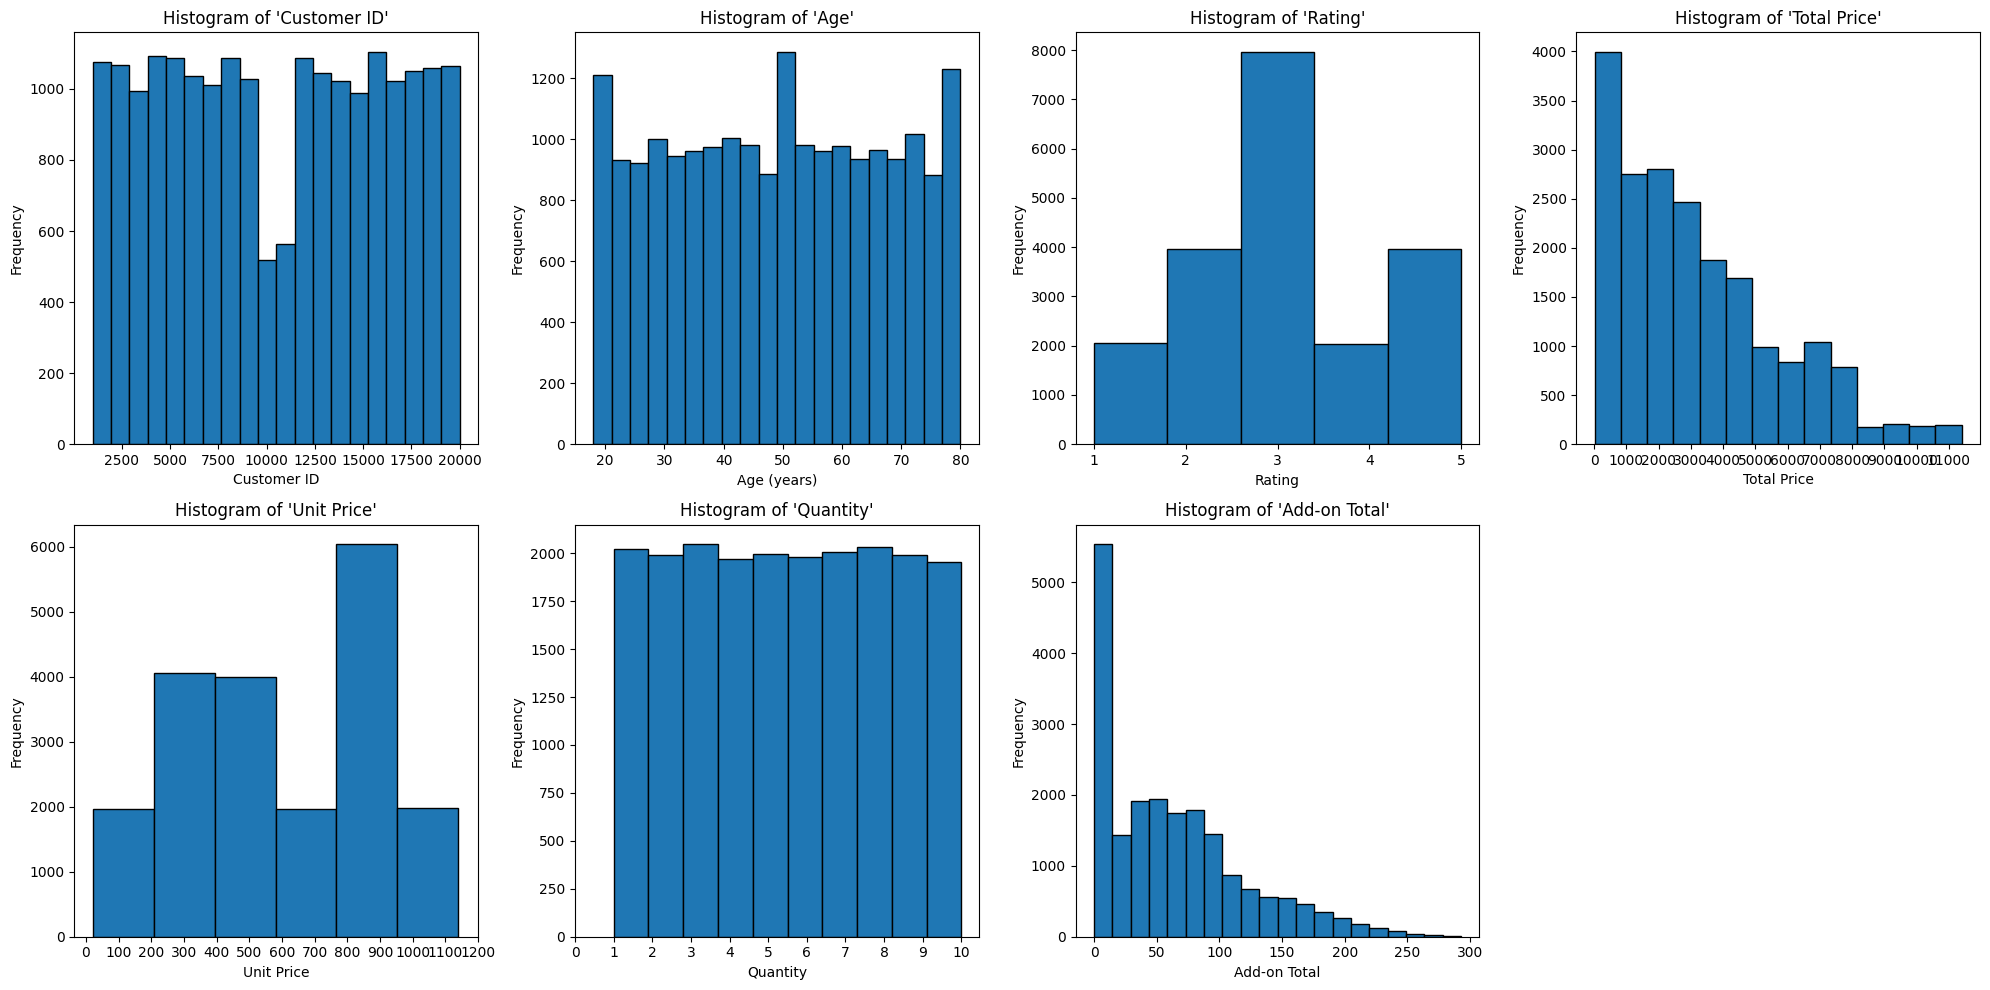

In [17]:
column_config = {
    'Customer ID': {'bins': 20, 'unit': '', 'xticks': None},
    'Age': {'bins': 20, 'unit': 'years', 'xticks': None},
    'Rating': {'bins': 5, 'unit': '', 'xticks': range(1, 6)},
    'Total Price': {
        'bins': 14,
        'unit': '',
        'xticks': range(0, int(num_col_df['Total Price'].max()) + 200, 1000),
    },
    'Unit Price': {
        'bins': 6,
        'unit': '',
        'xticks': range(0, int(num_col_df['Unit Price'].max()) + 100, 100),
    },
    'Quantity': {
        'bins': None,
        'unit': '',
        'xticks': range(0, int(num_col_df['Quantity'].max()) + 1),
    },
    'Add-on Total': {'bins': 20, 'unit': '', 'xticks': None},
}

num_cols = 4
num_rows = (len(column_config) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()

for i, (col, config) in enumerate(column_config.items()):
    bins = config['bins']
    unit = config['unit']
    xticks = config['xticks']

    axes[i].hist(num_col_df[col], bins=bins, edgecolor='black')
    axes[i].set_title(f"Histogram of '{col}'")
    axes[i].set_xlabel(f"{col} ({unit})" if unit else col)
    axes[i].set_ylabel('Frequency')

    if xticks:
        axes[i].set_xticks(xticks)

# Xóa các trục thừa nếu không sử dụng hết
for i in range(len(column_config), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

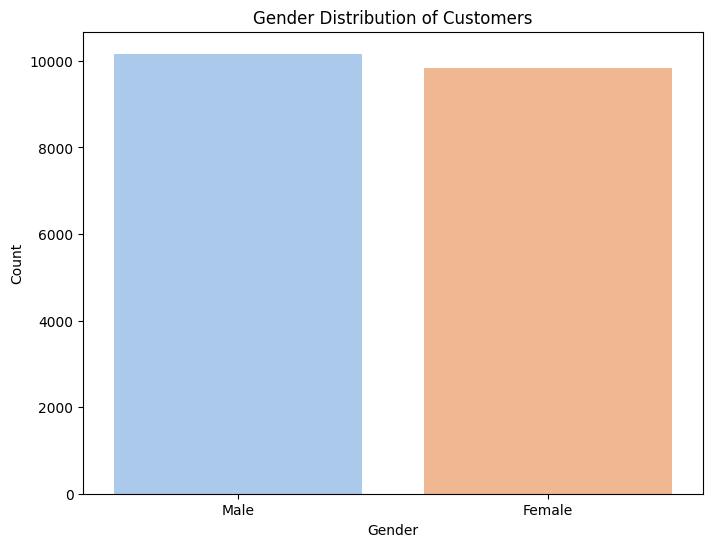

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

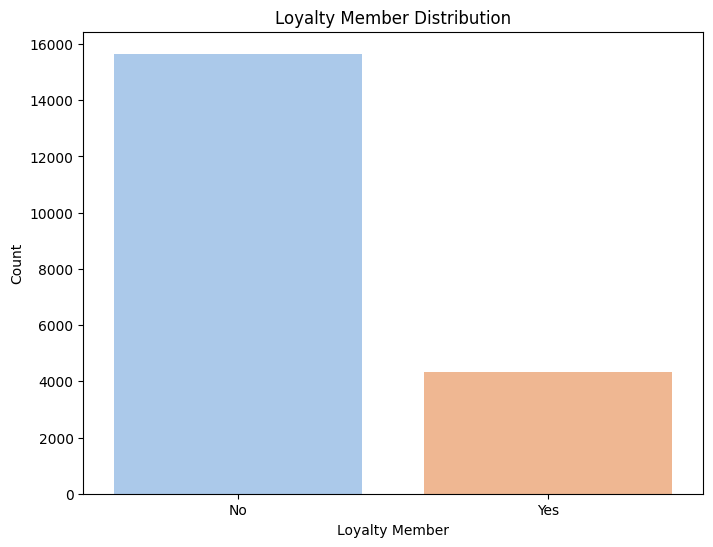

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loyalty Member', data=df, palette='pastel')
plt.title('Loyalty Member Distribution')
plt.xlabel('Loyalty Member')
plt.ylabel('Count')
plt.show()

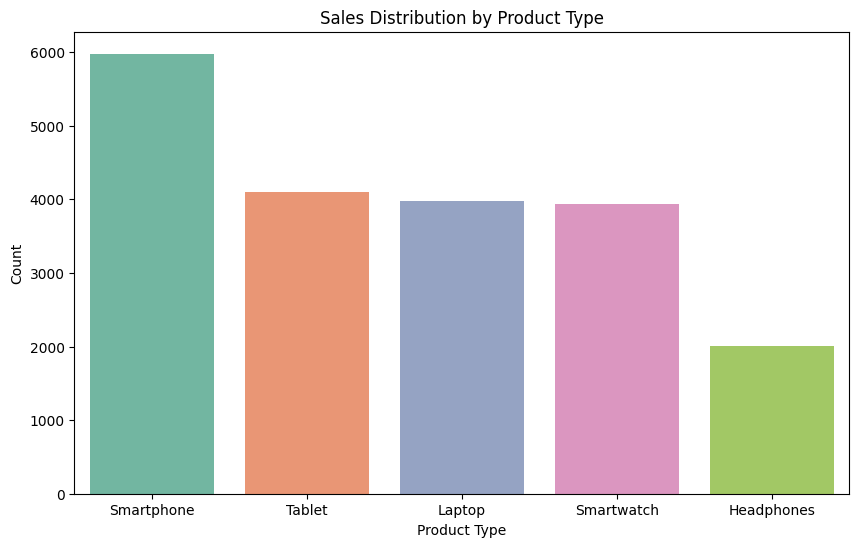

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Type', data=df, order=df['Product Type'].value_counts().index, palette='Set2')
plt.title('Sales Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

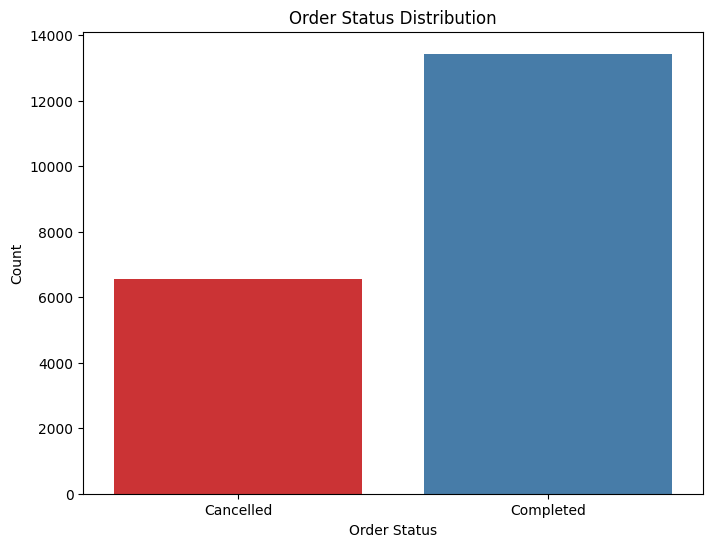

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Order Status', data=df, palette='Set1')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

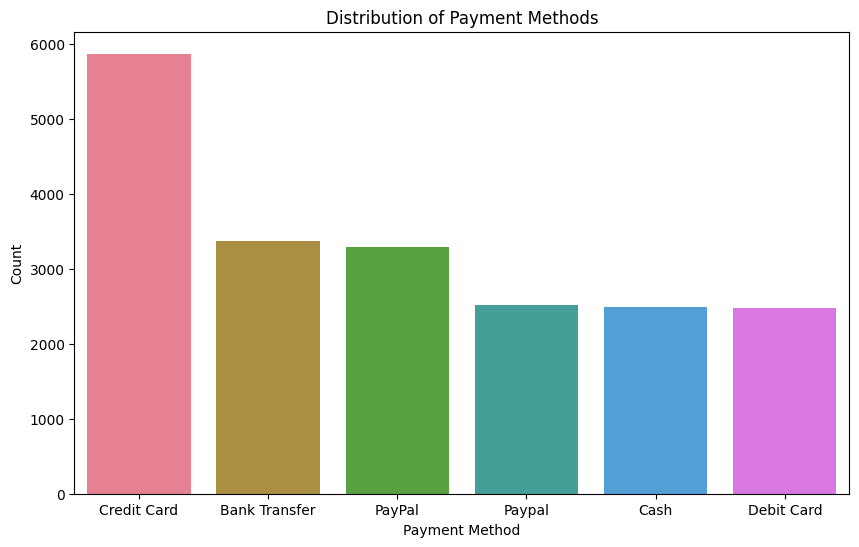

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', data=df, order=df['Payment Method'].value_counts().index, palette='husl')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

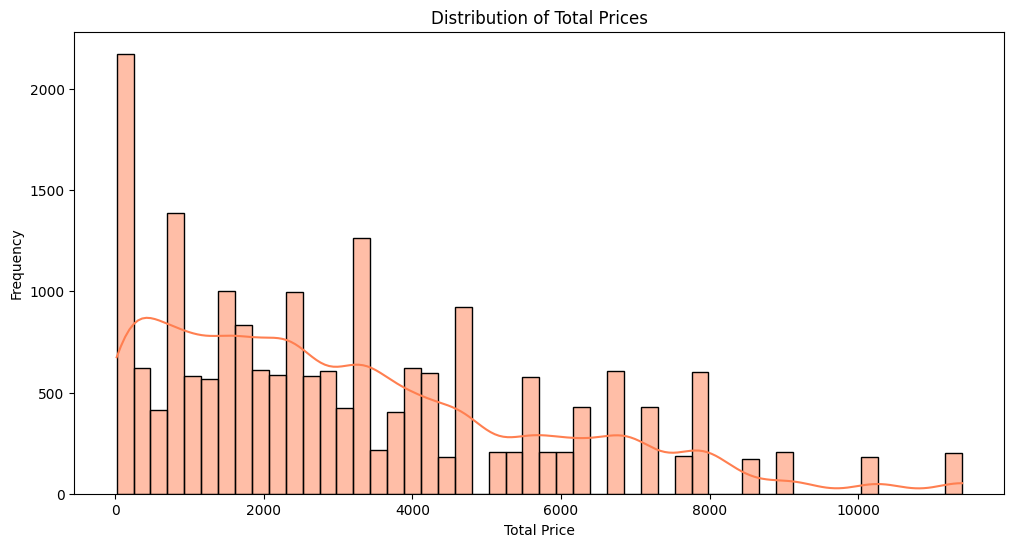

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Total Price'], bins=50, kde=True, color='coral')
plt.title('Distribution of Total Prices')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

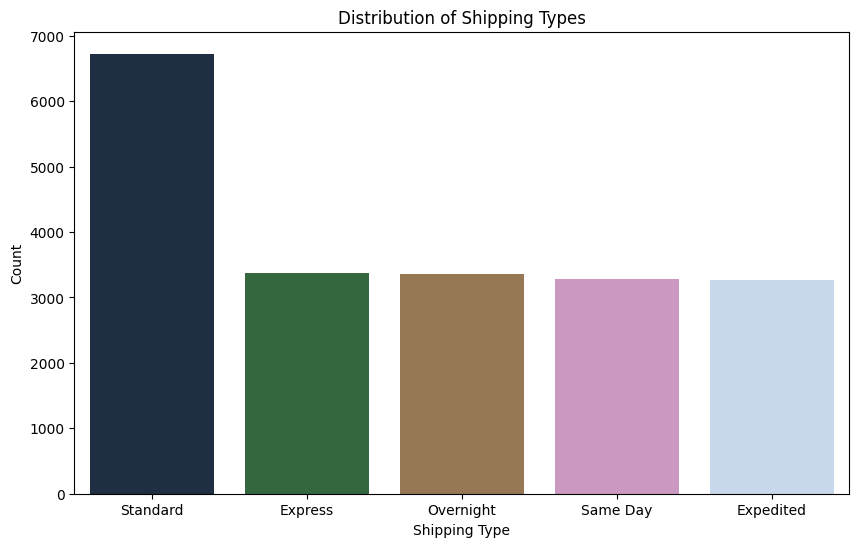

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping Type', data=df, order=df['Shipping Type'].value_counts().index, palette='cubehelix')
plt.title('Distribution of Shipping Types')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.show()

## **3. Asking Meaning Questions** 

### Question 1:
- How do purchase patterns vary across different age groups, genders, product types, and seasons?

- Benefits: Understanding the distribution of purchases across various age groups, genders, product types, and seasons is crucial for optimizing business strategies. This insight enables businesses to identify key consumer preferences, allowing for targeted marketing campaigns and product offerings. By aligning promotional efforts with seasonal trends and demographic preferences, companies can enhance customer engagement, improve inventory management, and drive higher sales.

### Question 2:
- How do loyalty membership statuses evolve over time, and what are the trends in customer behavior regarding membership transitions (e.g., New Member, Regular Member, Churned, Non Member)?
- Benefits:
Analyzing the evolution of loyalty membership statuses provides valuable insights into customer behavior and program effectiveness. Understanding these trends helps businesses identify patterns in member retention, new member acquisition, and churn rates. This knowledge enables companies to design targeted loyalty strategies, such as personalized offers for retaining regular members or re-engaging churned customers. By leveraging these insights, businesses can enhance customer satisfaction, increase program participation, and drive long-term revenue growth.


## **4. Pre-processing & Analyzing Data to Answer each Questions** 

### a. Question 1:

In [25]:
selected_df = df[['Age', 'Gender', 'Age', 'Product Type', 'Purchase Date']]
selected_df.head()

,Age,Gender,Age,Product Type,Purchase Date
0,53,Male,53,Smartphone,2024-03-20
1,53,Male,53,Tablet,2024-04-20
2,41,Male,41,Laptop,2023-10-17
3,41,Male,41,Smartphone,2024-08-09
4,75,Male,75,Smartphone,2024-05-21


In [26]:
# Define age groups
bins = [18, 35, 55, 75, 85]
labels = ['18-35','35-54', '55-74', '75+']

# Create a new column for age buckets
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age groups and Gender
age_addons = df.groupby(['Age Group', 'Gender']).size().reset_index(name='Count')

age_addons


,Age Group,Gender,Count
0,18-35,Female,2634
1,18-35,Male,2656
2,35-54,Female,3201
3,35-54,Male,3296
4,55-74,Female,3086
5,55-74,Male,3301
6,75+,Female,914
7,75+,Male,912


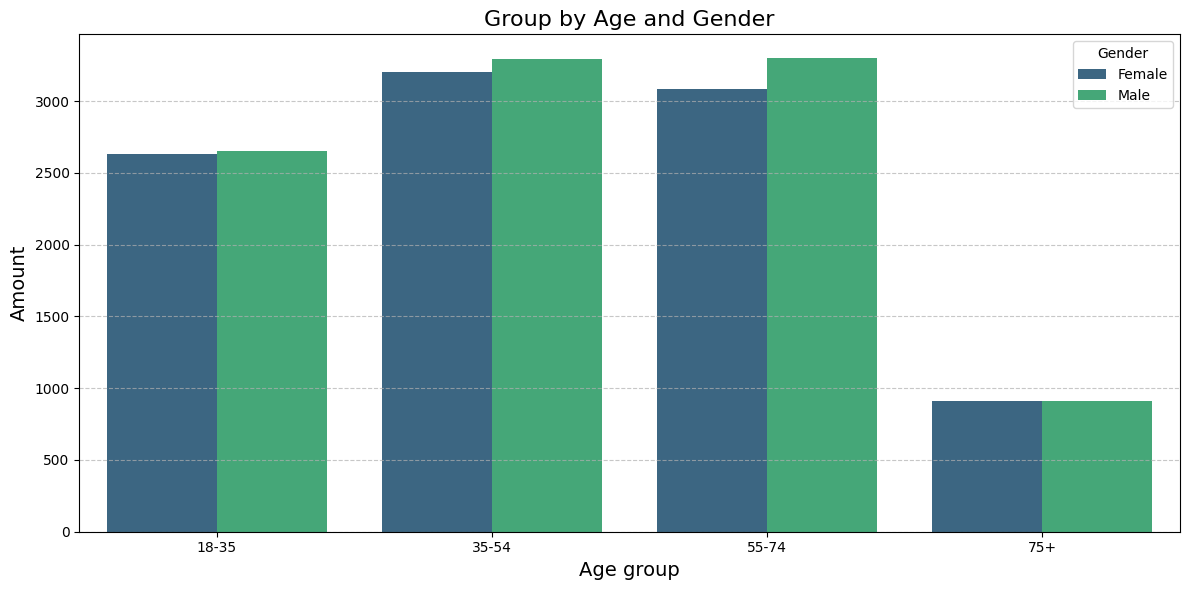

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(data=age_addons, x='Age Group', y='Count', hue='Gender', palette='viridis')

plt.title('Group by Age and Gender', fontsize=16)
plt.xlabel('Age group', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

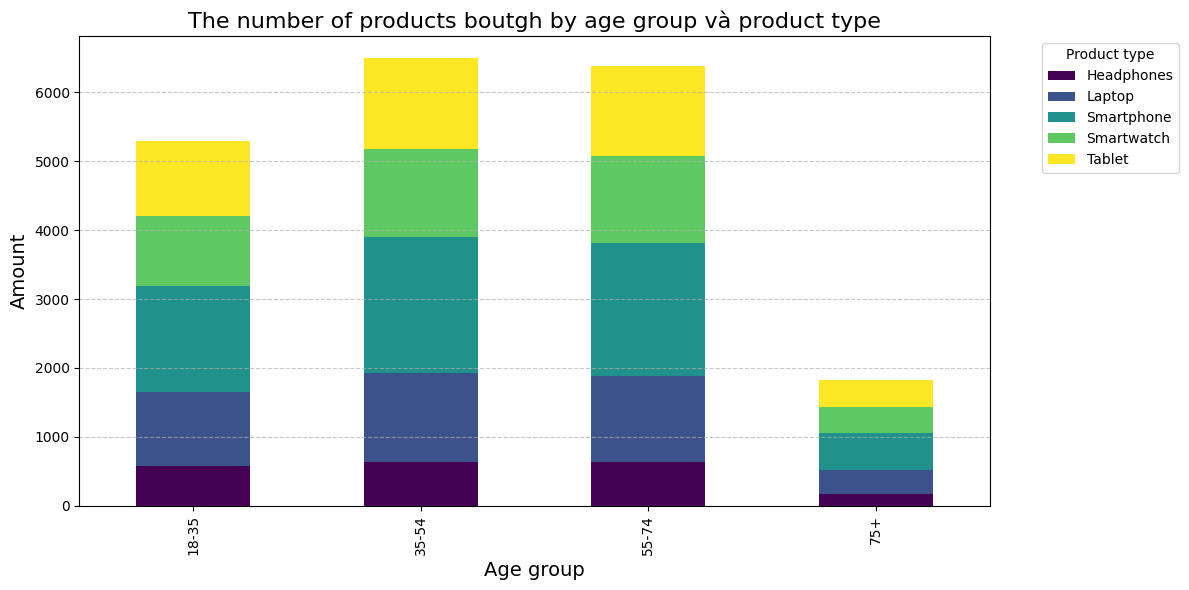

In [28]:
# Nhóm dữ liệu theo 'Age Group' và 'Product Type', sau đó đếm số lượng
product_by_age = df.groupby(['Age Group', 'Product Type']).size().reset_index(name='Count')

# Pivot dữ liệu để chuẩn bị cho stacked bar chart
pivot_data = product_by_age.pivot(index='Age Group', columns='Product Type', values='Count').fillna(0)

# Vẽ stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Tùy chỉnh biểu đồ
plt.title('The number of products boutgh by age group và product type', fontsize=16)
plt.xlabel('Age group', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend(title='Product type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [29]:
# Chuyển đổi cột 'Purchase Date' thành datetime nếu chưa làm
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')

# Hàm xác định mùa dựa trên tháng
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Tạo cột 'Season' dựa trên tháng
df['Season'] = df['Purchase Date'].dt.month.apply(get_season)
df


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Age Group,Season
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,35-54,Spring
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,35-54,Spring
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00,35-54,Autumn
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,35-54,Summer
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,75+,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,None,0.00,18-35,Summer
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,None,0.00,18-35,Summer
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,18-35,Summer
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34,18-35,Winter


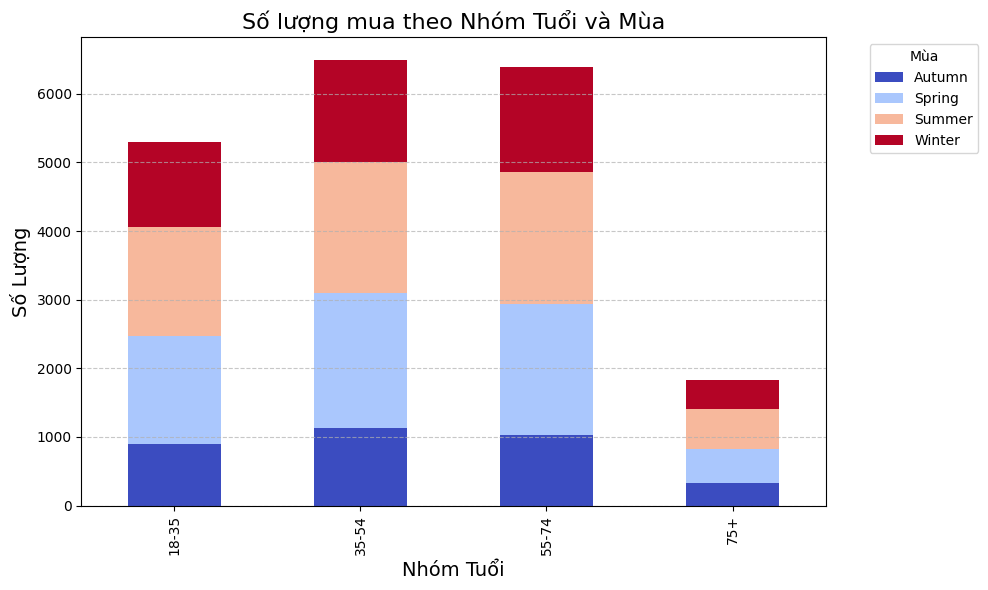

In [30]:
# Nhóm dữ liệu theo 'Age Group' và 'Season'
season_data = df.groupby(['Age Group', 'Season']).size().reset_index(name='Count')

# Pivot dữ liệu để chuẩn bị cho stacked bar chart (Age Group trên x-axis)
pivot_data = season_data.pivot(index='Age Group', columns='Season', values='Count').fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

# Tùy chỉnh biểu đồ
plt.title('Số lượng mua theo Nhóm Tuổi và Mùa', fontsize=16)
plt.xlabel('Nhóm Tuổi', fontsize=14)
plt.ylabel('Số Lượng', fontsize=14)
plt.legend(title='Mùa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

### b. Question 2:

In [31]:
# To accurately count the Members we need to look at UNIQUE customer_ID
Member_counts = df.groupby('Loyalty Member')['Customer ID'].nunique().reset_index()
Member_counts.columns = ['Loyalty Member', 'Count']
Member_counts = Member_counts.sort_values(by='Count', ascending=False)

Member_counts

,Loyalty Member,Count
0,No,10572
1,Yes,3834


In [34]:
# Visualize member counts
New_Member_counts = loyalty_df.groupby('Loyalty Status')['Customer ID'].nunique().reset_index()

New_Member_counts.columns = ['Loyalty Status', 'Count']

New_Member_counts = New_Member_counts.sort_values(by='Count', ascending=False)

New_Member_counts

,Loyalty Status,Count
2,Non Member,9805
3,Regular Member,2682
0,Churned,1353
1,New Member,1328


In [35]:
# Copy data so we can use it for determining loyalty member status
loyalty_df = df.copy()

# Sort by Customer ID and Purchase Date
loyalty_df.sort_values(by=['Customer ID', 'Purchase Date'], inplace=True)

# Determine loyalty status
def determine_loyalty_status(group):
    statuses = []
    previous_status = None
    
    for _, row in group.iterrows():
        current_status = row['Loyalty Member']
        
        if previous_status is None:  # First order
            if current_status == 'Yes':
                statuses.append('Regular Member')
            else:
                statuses.append('Non Member')
        else:
            if previous_status == 'Yes' and current_status == 'No':
                statuses.append('Churned')
            elif previous_status == 'No' and current_status == 'Yes':
                statuses.append('New Member')
            elif current_status == 'Yes':
                statuses.append('Regular Member')
            else:
                statuses.append('Non Member')
        
        previous_status = current_status
    
    return pd.Series(statuses, index=group.index)

# Apply the function to get member statuses
loyalty_df['Loyalty Status'] = loyalty_df.groupby('Customer ID').apply(determine_loyalty_status).reset_index(drop=True)

# Display updated info
loyalty_df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Age Group,Season,Loyalty Status
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,35-54,Spring,Non Member
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,35-54,Spring,Non Member
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00,35-54,Autumn,Non Member
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,35-54,Summer,New Member
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,75+,Spring,Regular Member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,None,0.00,18-35,Summer,Non Member
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,None,0.00,18-35,Summer,New Member
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,18-35,Summer,Churned
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34,18-35,Winter,Non Member


- New memberships status counts visualized¶

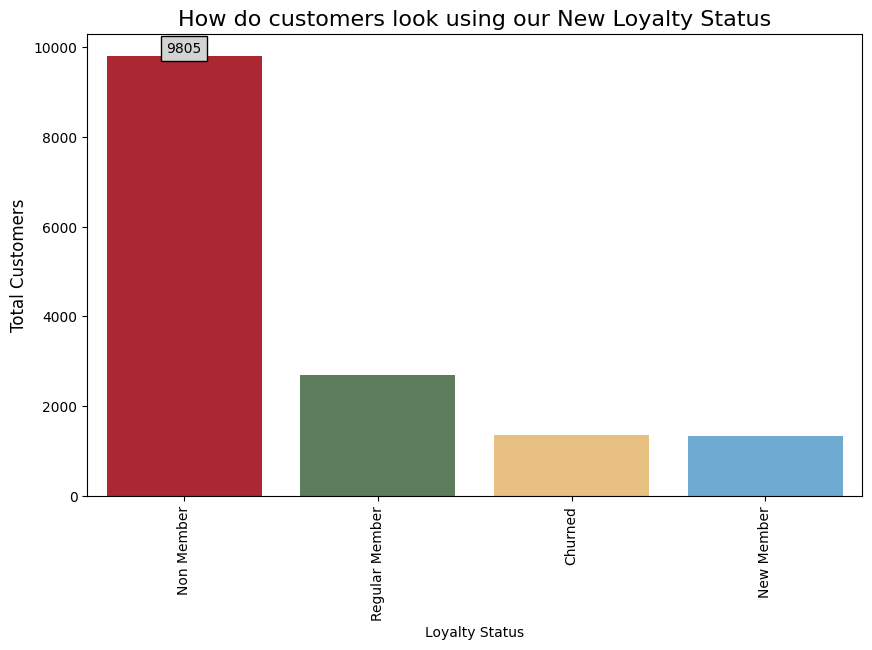

In [36]:
# Visualize New status memberships

colors = ["#c1121f", "#588157", "#f8c471", "#5dade2"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=New_Member_counts, x='Loyalty Status', y='Count', palette=colors)
plt.title('How do customers look using our New Loyalty Status', fontsize=16)
plt.xlabel('Loyalty Status', fontsize=10)
plt.ylabel('Total Customers', fontsize=12)
ax.bar_label(ax.containers[0], bbox=dict(facecolor='lightgrey'))

plt.xticks(rotation=90)
plt.show()

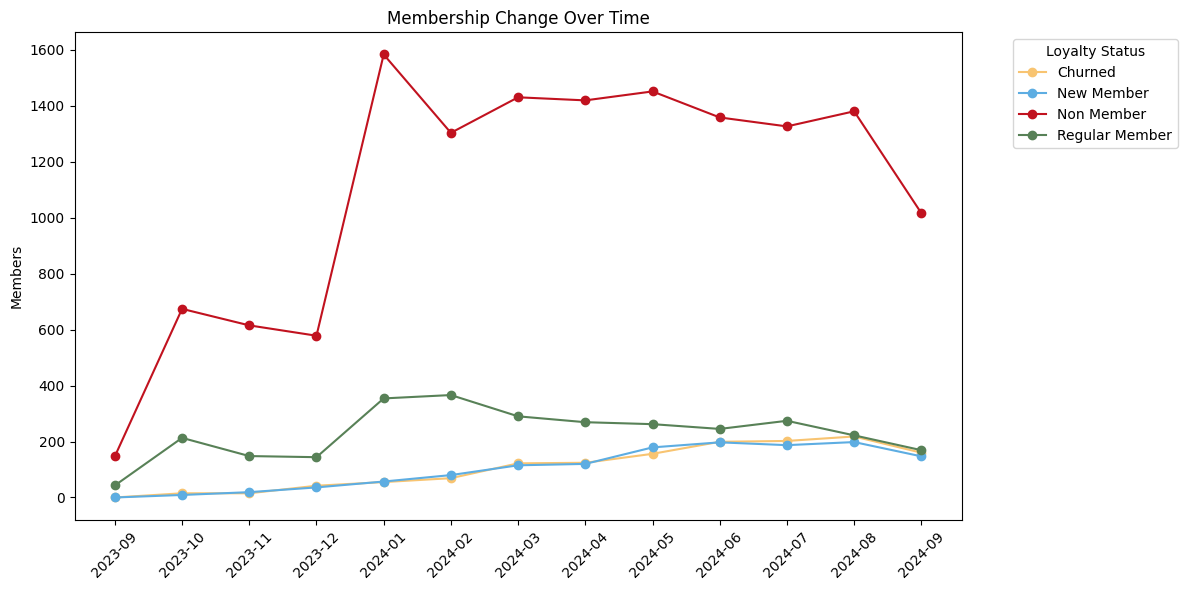

In [83]:
# Visualize membership over time
colors = {
    'Regular Member': "#588157",
    'Non Member': "#c1121f",
    'Churned': "#f8c471",
    'New Member': "#5dade2"
}

# Extract month and year from purchase date
loyalty_df['YearMonth'] = loyalty_df['Purchase Date'].dt.to_period('M')

# Count each loyalty status per month
members_counts = loyalty_df.groupby(['YearMonth', 'Loyalty Status']).size().reset_index(name='Count')

# Pivot the data to have statuses as columns
members_pivot = members_counts.pivot(index='YearMonth', columns='Loyalty Status', values='Count').fillna(0)

# Plot
plt.figure(figsize=(12, 6))

# Use a line plot for better visibility of trends
for status in members_pivot.columns:
    plt.plot(members_pivot.index.astype(str), members_pivot[status], marker='o', label=status, color=colors.get(status))

plt.title('Membership Change Over Time')
plt.xlabel('') # remove Date label because this data is obvious
plt.ylabel('Members')
plt.xticks(rotation=45)
plt.legend(title='Loyalty Status', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## **5. Reflection**

- The data preprocessing step is a critical phase, and thankfully, the dataset used here was relatively well-prepared. However, my limited understanding of the subject made it challenging to formulate meaningful questions from the data during the Exploratory Data Analysis (EDA) phase. This challenge led to significant time spent identifying and selecting the most appropriate questions within the scope of my capabilities.

## **References**

https://www.kaggle.com/code/cameronseamons/customer-purchase-behavior-analysis
